<a href="https://colab.research.google.com/github/IreneLedyaeva/CAP-5610/blob/master/HW1/problem_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load the training and test data using Keras

In [0]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

### Preparing the training and test images

In [0]:
train_images = train_images_original.reshape(train_images_original.shape[0], 28 * 28)
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape(test_images_original.shape[0], 28 * 28)
test_images = test_images.astype('float32') / 255

### Encoding the training and test labels [0, 1]

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

### Counting a number of connected components in train_images_bw [1, 2 or 3]

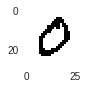

White regions:  2


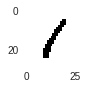

White regions:  1


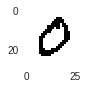

White regions:  2


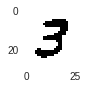

White regions:  1


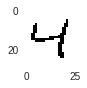

White regions:  1


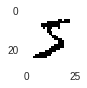

White regions:  1


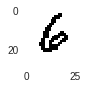

White regions:  2


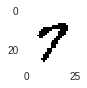

White regions:  1


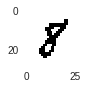

White regions:  3


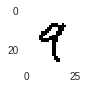

White regions:  2


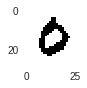

White regions:  2


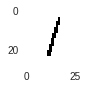

White regions:  1


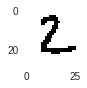

White regions:  1


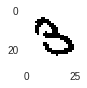

White regions:  1


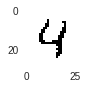

White regions:  1


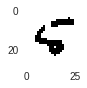

White regions:  2


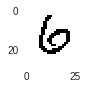

White regions:  1


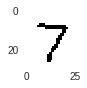

White regions:  1


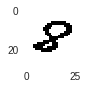

White regions:  3


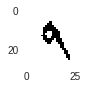

White regions:  2


In [78]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def countComponents(image):
  
  G = nx.Graph()
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if(image[i][j] == 0):
        node = str(i) + str(j)
        G.add_node(node)

  for i in range(image.shape[0]):
    for j in range(image.shape[1] - 1):
      if(image[i][j] == 0 and image[i][j+1] == 0):
        node1 = str(i) + str(j) 
        node2 = str(i) + str(j+1)
        G.add_edge(node1, node2)

  for i in range(image.T.shape[0]):
    for j in range(image.T.shape[1] - 1):
      if(image.T[i][j] == 0 and image.T[i][j+1] == 0):
        node1 = str(j) + str(i) 
        node2 = str(j+1) + str(i)
        G.add_edge(node1, node2)
        
  return len(list(nx.connected_components(G)))

def createRegions(labels, images):
  regions = labels.reshape(labels.shape[0], 1)
  for i in range(10):
    filter_ = np.where(labels == i)
    images_bw, labels_bw = images[filter_], labels[filter_]
    images_bw = images_bw.astype('float32') / 255
    images_bw = np.around(images_bw)
    digit_0 = images_bw[0]
    plt.figure(figsize=(1,1))
    plt.imshow(digit_0)
    plt.grid(None)
    plt.show()
    num_components = countComponents(images_bw[0]) 
    regions[regions == i] = num_components
    print("White regions: ", num_components)
  return regions
  
train_regions = createRegions(train_labels_original, train_images_original)
test_regions = createRegions(test_labels_original, test_images_original)

### Normalizing a new feature input

In [0]:
train_regions = train_regions.astype('float32') / 3
test_regions = test_regions.astype('float32') / 3

### The network architecture

In [80]:
from keras import models
from keras import layers

image_input = layers.Input(shape=(28 * 28,))
x1 = layers.Dense(10, activation='softmax')(image_input)
region_input = layers.Input(shape=(1,))
x2 = layers.Dense(10, activation='softmax')(region_input)
added = layers.Add()([x1, x2])

out = layers.Dense(10)(added)
model = models.Model(inputs=[image_input, region_input], outputs=out)

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
epochs = 10
history = model.fit([train_images, train_regions], 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=20, 
                      validation_data=([test_images, test_regions], test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 9.4819 - acc: 0.1427 - val_loss: 8.6024 - val_acc: 0.0982
Epoch 2/10
60000/60000 [==============================] - 5s 76us/step - loss: 8.8237 - acc: 0.0973 - val_loss: 8.8314 - val_acc: 0.0981
Epoch 3/10
60000/60000 [==============================] - 5s 76us/step - loss: 9.0573 - acc: 0.0974 - val_loss: 9.2615 - val_acc: 0.0982
Epoch 4/10
60000/60000 [==============================] - 5s 76us/step - loss: 9.2365 - acc: 0.0974 - val_loss: 9.2615 - val_acc: 0.0982
Epoch 5/10
60000/60000 [==============================] - 5s 76us/step - loss: 9.2365 - acc: 0.0974 - val_loss: 9.2615 - val_acc: 0.0982
Epoch 6/10
60000/60000 [==============================] - 5s 76us/step - loss: 9.2365 - acc: 0.0974 - val_loss: 9.2615 - val_acc: 0.0982
Epoch 7/10
60000/60000 [==============================] - 5s 76us/step - loss: 9.2365 - acc: 0.0974 - val_loss: 9.2615 - val_acc